In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = { 'DF': 'Federal District',
                    'AC': 'State of Acre',
                    'AL': 'State of Alagoas',
                    'AP': 'State of Amapá', 
                    'AM': 'State of Amazonas', 
                    'BA': 'State of Bahia',
                    'CE': 'State of Ceará',
                    'ES': 'State of Espírito Santo',
                    'GO': 'State of Goiás',
                    'MA': 'State of Maranhão', 
                    'MT': 'State of Mato Grosso',
                    'MS': 'State of Mato Grosso do Sul',
                    'MG': 'State of Minas Gerais',
                    'PA': 'State of Pará', 
                    'PB': 'State of Paraíba', 
                    'PR': 'State of Paraná', 
                    'PE': 'State of Pernambuco',
                    'PI': 'State of Piauí',
                    'RJ': 'State of Rio de Janeiro',
                    'RS': 'State of Rio Grande do Norte',
                    'RS': 'State of Rio Grande do Sul',
                    'RO': 'State of Rondônia',
                    'RR': 'State of Roraima',
                    'SC': 'State of Santa Catarina', 
                    'SP': 'State of São Paulo',
                    'SE': 'State of Sergipe',
                    'TO': 'State of Tocantins'
                  }

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']


{'SP':         country_region_code country_region        sub_region_1 sub_region_2  \
1330235                  BR         Brazil  State of São Paulo          NaN   
1330236                  BR         Brazil  State of São Paulo          NaN   
1330237                  BR         Brazil  State of São Paulo          NaN   
1330238                  BR         Brazil  State of São Paulo          NaN   
1330239                  BR         Brazil  State of São Paulo          NaN   
...                     ...            ...                 ...          ...   
1330746                  BR         Brazil  State of São Paulo          NaN   
1330747                  BR         Brazil  State of São Paulo          NaN   
1330748                  BR         Brazil  State of São Paulo          NaN   
1330749                  BR         Brazil  State of São Paulo          NaN   
1330750                  BR         Brazil  State of São Paulo          NaN   

        metro_area iso_3166_2_code  census_f

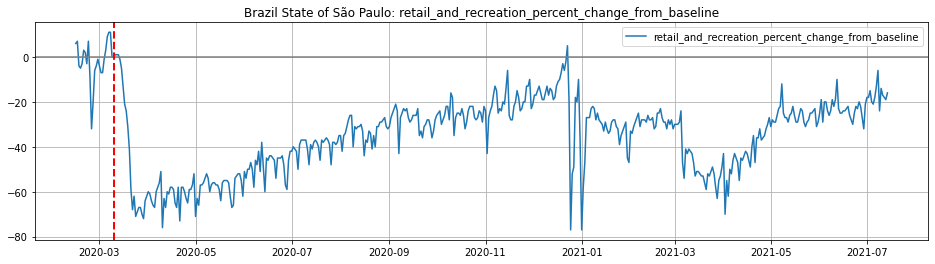

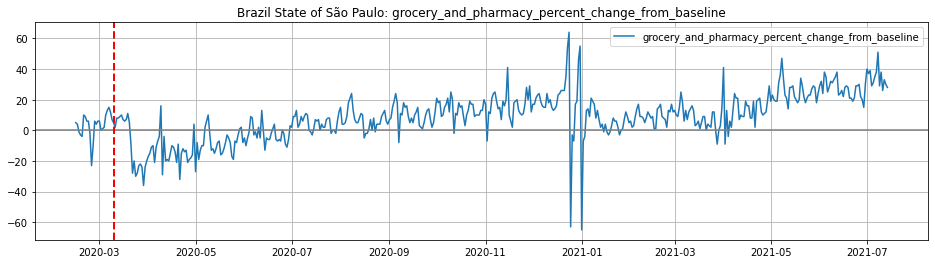

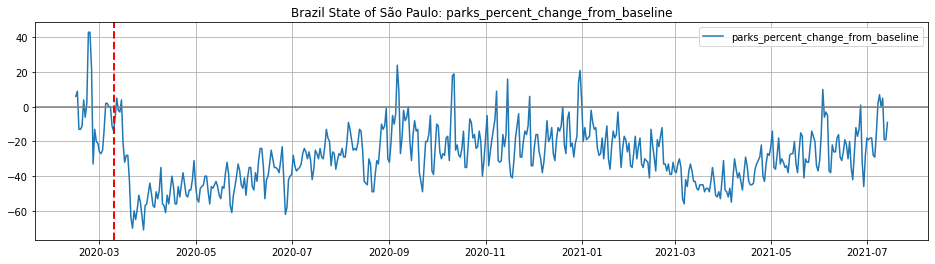

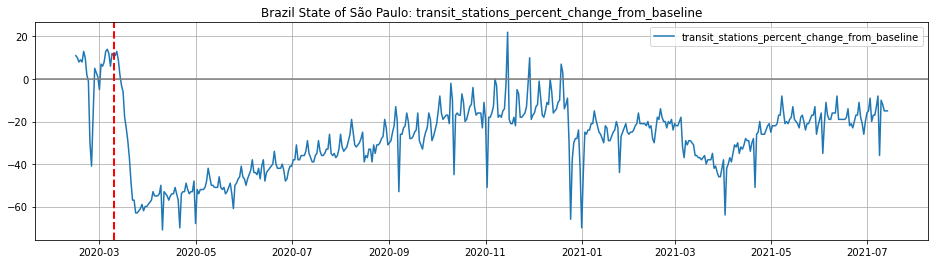

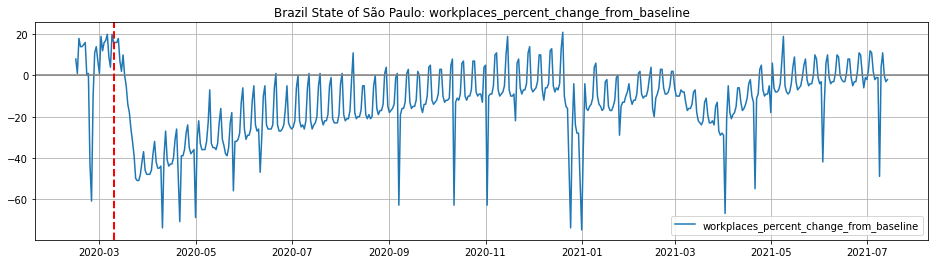

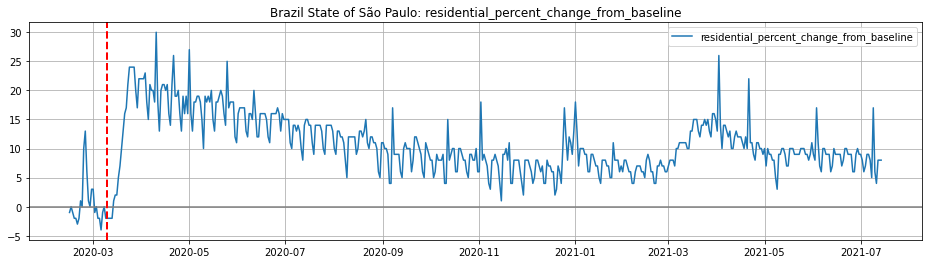

In [4]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r, s in regions_list.items():
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==s) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
sdf = getAllRegionsGroups(regions_list={'SP':'State of São Paulo'})   #, 'State of Rio de Janeiro'
print(sdf)
plotGroups(sdf['SP'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [5]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
    
#     print(regions_list)
    for s, r in regions_list.items():
        sub_df = covid_df[(covid_df['state'] == s)]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[s]=sub_df
#     print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13785       128  2021-07-17  Brazil     SC  TOTAL         26   17546   
13786       128  2021-07-17  Brazil     SE  TOTAL          4    5857   
13787       128  2021-07-17  Brazil     SP  TOTAL          0  134320   
13788       128  2021-07-17  Brazil     TO  TOTAL          0    3396   
13789       128  2021-07-17  Brazil  TOTAL  TOTAL        777  541510   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [6]:
regions_selected = {**regions_list_BR}

cases_df = getAllRegionsCovid(regions_selected)
print(cases_df)
newCases = cases_df['SP']['newCases'].values
covid_dates = cases_df['SP']['date'].values

mob_df = getAllRegionsGroups(regions_list=regions_selected)
mob_dates = mob_df['SP']['date'].values
mob_dates += np.timedelta64(7,'D') # com offset de 7 dias

scaler = MinMaxScaler(feature_range=(-1,1))
newCases_norm = newCases/np.max(newCases)

mobility_norm = scaler.fit_transform(mob_df['SP'][categories_google_mobility].values)
print(newCases)

for r, s in regions_selected.items():
    print(r)
    newCases = cases_df[r]['newCases'].values
    covid_dates = cases_df[r]['date'].values

    mob_df = getAllRegionsGroups(regions_list=regions_selected)
    mob_dates = mob_df[r]['date'].values
    mob_dates += np.timedelta64(7,'D') # com offset de 7 dias

    scaler = MinMaxScaler(feature_range=(-1,1))
    newCases_norm = newCases/np.max(newCases)

    mobility_norm = scaler.fit_transform(mob_df[r][categories_google_mobility].values)
    print(newCases)

{'DF':        epi_week       date country state   city  newDeaths  deaths  newCases  \
27           10 2020-03-07  Brazil    DF  TOTAL          0       0         1   
34           11 2020-03-08  Brazil    DF  TOTAL          0       0         0   
42           11 2020-03-09  Brazil    DF  TOTAL          0       0         0   
50           11 2020-03-10  Brazil    DF  TOTAL          0       0         0   
59           11 2020-03-11  Brazil    DF  TOTAL          0       0         1   
...         ...        ...     ...   ...    ...        ...     ...       ...   
13656       128 2021-07-13  Brazil    DF  TOTAL         18    9407       419   
13684       128 2021-07-14  Brazil    DF  TOTAL         13    9420       663   
13712       128 2021-07-15  Brazil    DF  TOTAL         14    9434       453   
13740       128 2021-07-16  Brazil    DF  TOTAL         21    9455       753   
13768       128 2021-07-17  Brazil    DF  TOTAL         12    9467       517   

       totalCases  deathsMS  ...

[    1     0     0     1     0     0     0     0     1     3     4     3
     3     0     3    11    16    10     9    71    16    12    77    45
   110    63   172   114    65    52   191   170   183    45    66   822
   642   525   542   418   154   246   816  1026   772   736   203   336
   140   476  1672   525  1273  1053   373   313   805   529   826  1086
  2178   711   981  2345  2117  2540  1676   800   598   415  1866  3800
  2075  1902  2581  1033   687  1588  3378  3189  4092  2805  1162   721
  2929  3864  3880  3132  3687  1603  1464  2392  3466  6382  5691  5586
  2556  1598  6999  5188  5717  5365  5984  2524  1520  5545  6178  6204
  5380  4975  5327  3258  8825  1232  1111 19030  4135  3392  2788  7502
  9347  9765  9921  7073  6156  3408  6235  8555 12244  8523  1828  7649
  2891  9638  8657  8350  9395  7780  5107  2610 12000  6569  8872  5367
  4612  3022  1385  6235 16777 12561 11211 16263  4501  3672 12647 13896
 14809 13298 10014  6367  1533 15371  9676 13405  9

[   1    0    0    0    0    1    0    1    1    4    0    2    1    1
    7   10    3    7   12   56   21   38   27   44    7   64   34   20
   13   25   16   19   31   26   63   93   41  132   21   76   98   64
   41   66  295  251  198  115  153  123  171  120   58  239   95  423
  202  204  118   71  287  239  639  467  436  262  231  383  652  533
  317  844  289  288  621  596  444  776  446  272  249  477  852  543
  517  639  190  301 1211  594  769  535 1652  266 3022 1575  482  496
  247  239   84  268  239  435  226  421  235   74  121  290  230  239
  317  199   85  188  333  523  596  432  149  120  440  260  255  178
  188  136   58  144  333  276  299  196  127   44  165  195  319  417
  229  175   69  191  237  165  214  229  187   87  185  254  254  392
  272  156   89  134  299  428  304  340  146  121  301  321  286  264
  390  228   88   93  136  252  278  136  124   64  102  162  149  106
  229  137  125   83  189  229  152  141   88   50  140  119  200  131
  144 

[   1    0    0    0    0    0    0    0    0    0    0    0    8    4
    3   10    0    7    7    0    8    6    7   11   13   12   23   19
   14   13   28   15   18   46   27   49   34   47   33   94  177  201
   17  147   96   17  101   38  102  212   46  108  125  220  374  150
  225  191  104  143  189  174  274  254  170  187  220  268  314  412
  385  397  149  413  536  802  383  642  398   89  358  524  595  719
  700  534  253  595  866  970  773 1215  841  669 1040 1305 1427 1037
 1074  509  458 1183 1378 1477 1265 1460 1006  628 1281  680 1656 1923
 1246    0 2031 1414 1796 1928 1421 1447 1135  569 1154 2156 2138 1168
 1352 1032  480 1008 1332 1139 1766 1345  668  478 1094  902 1150  855
 1244  744  603  979 1288 1179 1239 1406  522  441  960  994 1034 1300
 1380 1223  645 1278 1409 1275 1196 1157  659  815 1279 1015 1216 1079
  819  645  259  602  697  718  753  831  532  326  912  809  755  932
  941  472  333  288  785  692  868  676  540  194  704  722  736  761
  802 

[   2    0    2    2    1    2    3    4    5    0    3    0    1    3
    3    5    8    4    3    2    7    2    3    1   14    5    4    8
    3    1   12    2    6   10   12   18    7    3    2    2   11   27
    4   17    4    2    9    6    6    5    6    2    9    5   23   15
   20   16   23   20   25   22   27   29   62   43   29   51   53   59
   53  165   77   86   76   94   62   71   79   78  156  123   72  135
  121   71  131  142  256  148  234  198  118  234  379  110  392  324
  247  154  393  417  322  390  394  220  149  289  711  386  326  522
  179  164  434  376  608  590  708  228  264  473  697  699  475  201
  397  234  749 1503  782  632  712  499  288  641  968  876  649  803
  264  642 1033  637  786  887  719  637  395  823  947 1050  875 1108
  294  589  968  988  820  510 1177  610  567 1259 1035  902  891  871
  499  415  883  825  930  831  922  163  634  238  982  701 2258  367
  406  331  889  666  831 1023  649  382  185  926  652  815  770  638
  258 

[    6     0     0     0     0     6     3     9    13     7    10     6
    10    27     9    19    12    15     8    25    44    29    49    94
    44    21    45    39    71    34    33    62    18    35    13    29
    42    73    42    20    17    38    19    37    22    16    30    85
    78    59    41    46    23    48    27    39    31    56    75    50
    14    57    93    68    76   105    44    74   129   137   199   130
   162   113   124   183   201   273   259   238   214   148   335   332
   328   539   259   294   134   289   524   635   249   535   353   133
   851   535   834   873   889   680   623   729  1110   859   850  1147
   923   584  1551  1348  2079  1863  2404   889  1310  1539  1406  1709
  2088  1285  1740  1045  1781  1761  2281  1916  2232  1076  1280  1629
  2389  2077  2255  1334  1627   781  1392  1527  2568  2624  1818  1675
  1260  1853  2599  1952  2697  1161  1739  1507  1570  1842  1882  2177
  1927  1335  1273  1858  1659  2349  2343  2260  1

[    1     1     2     0     2     0     2     2     9    12    12    26
     8    19    16    50    28     7     3    30    24    51    11    70
    24     8    50    33    54    26    55     4    13    11    21    35
    42    30    39    23    15    35    14    52    69    57    70    42
    48    94    70   109    90    47    24    78   251    81    82   311
    49    34   232   109    80   104   594    39     1    15    48  1175
   500   445   418   134    89   226   263  1186   609   399    90   164
   423   479   612   573   454    98   115   552   817   549   216   243
    34   777  1033   657   694   765   551   210   362  1154  1145  1051
  1054   886   243   416  1282  1230  1024  1176  1248   336   446  1399
  1757   877  1056  1230   520   416  1337  1246  3105  1366   137   266
   336  2391  3233  1768  2166  2111   661   265  2303  2149  1977   219
  3764   584   439  2139  2945  2274   189  4569   396    43  3381  2634
  2511  2582  2303   432   130  3210  2674   177   

[    1     0     0     1     0     0     0     0     1     3     4     3
     3     0     3    11    16    10     9    71    16    12    77    45
   110    63   172   114    65    52   191   170   183    45    66   822
   642   525   542   418   154   246   816  1026   772   736   203   336
   140   476  1672   525  1273  1053   373   313   805   529   826  1086
  2178   711   981  2345  2117  2540  1676   800   598   415  1866  3800
  2075  1902  2581  1033   687  1588  3378  3189  4092  2805  1162   721
  2929  3864  3880  3132  3687  1603  1464  2392  3466  6382  5691  5586
  2556  1598  6999  5188  5717  5365  5984  2524  1520  5545  6178  6204
  5380  4975  5327  3258  8825  1232  1111 19030  4135  3392  2788  7502
  9347  9765  9921  7073  6156  3408  6235  8555 12244  8523  1828  7649
  2891  9638  8657  8350  9395  7780  5107  2610 12000  6569  8872  5367
  4612  3022  1385  6235 16777 12561 11211 16263  4501  3672 12647 13896
 14809 13298 10014  6367  1533 15371  9676 13405  9

retail_and_recreation_percent_change_from_baseline


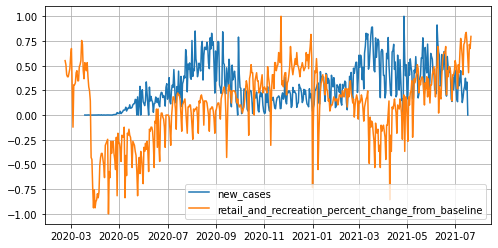

grocery_and_pharmacy_percent_change_from_baseline


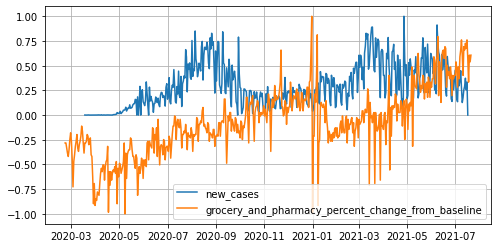

parks_percent_change_from_baseline


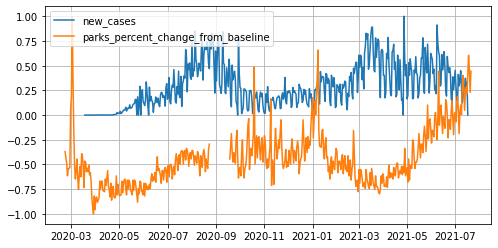

transit_stations_percent_change_from_baseline


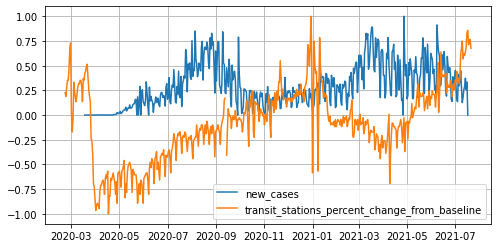

workplaces_percent_change_from_baseline


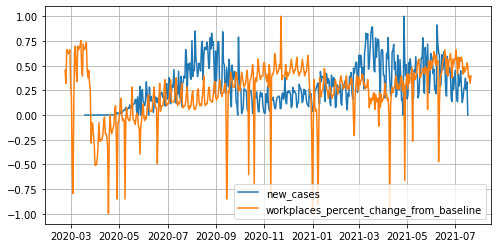

residential_percent_change_from_baseline


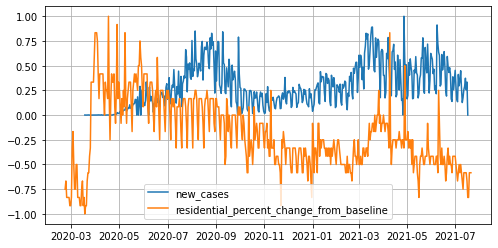

In [7]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.plot(covid_dates[:], newCases_norm[:], label="new_cases")
    plt.plot(mob_dates[:], group_values[:], label=group)
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

retail_and_recreation_percent_change_from_baseline


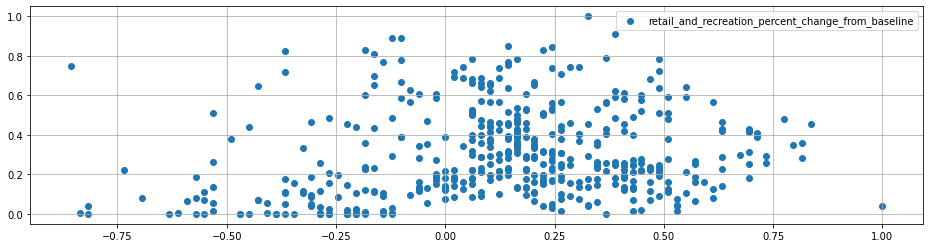

grocery_and_pharmacy_percent_change_from_baseline


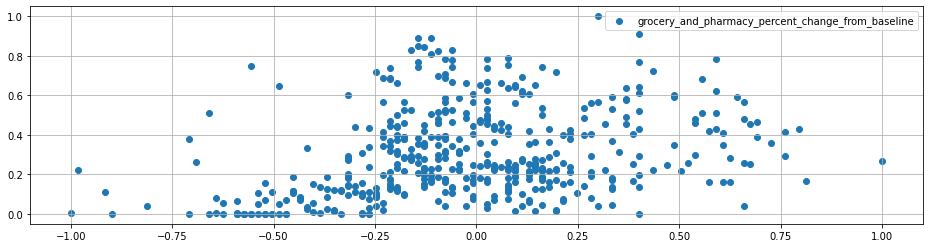

parks_percent_change_from_baseline


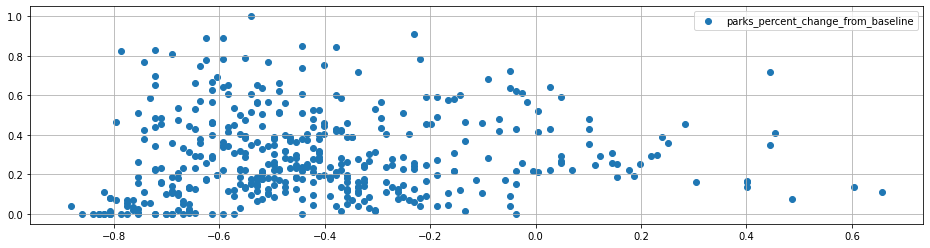

transit_stations_percent_change_from_baseline


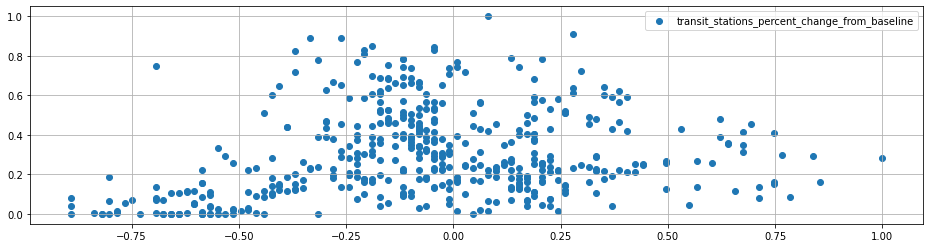

workplaces_percent_change_from_baseline


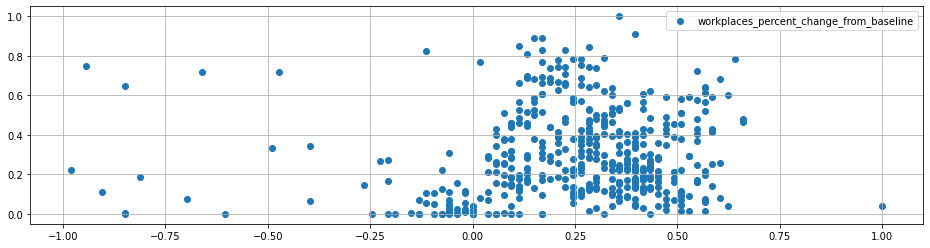

residential_percent_change_from_baseline


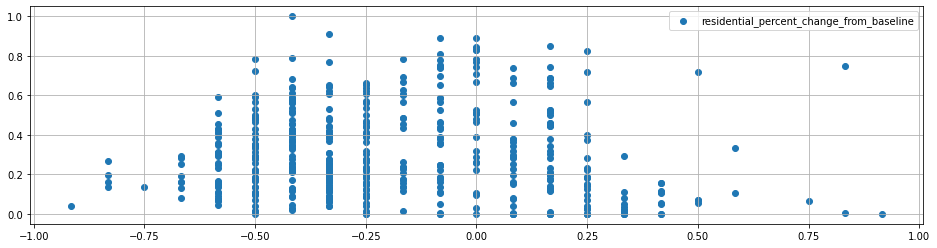

In [8]:
i = 0
for group in categories_google_mobility:
    print(group)
    group_values = mobility_norm[:,i]
    fig, ax = plt.subplots(figsize=(16, 4))
    plt.scatter(group_values[-460:], newCases_norm[-470:-10], label=group) #com offset de 7 dias
#     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
    plt.legend(loc='best') 
    plt.grid()
    plt.show()
    
    i+=1

In [9]:
from keras.models import Sequential
from keras.layers import Dense

X = mobility_norm[-460:,:]
Y = newCases_norm[-470:-10]
Y = Y.reshape((len(Y),1))

print("Mobility Features")
print(X[:5])
print("X shape: ",X.shape)


print("Covid Cases")
print(Y[:5])
print("Y shape: ",Y.shape)



Mobility Features
[[-5.71428571e-01 -5.72649573e-01 -7.54010695e-01 -8.19819820e-01
  -2.07547170e-01  1.66666667e-01]
 [-6.32653061e-01 -7.09401709e-01 -8.28877005e-01 -8.19819820e-01
  -5.55111512e-17 -2.50000000e-01]
 [-2.65306122e-01 -5.72649573e-01 -6.89839572e-01 -6.39639640e-01
  -1.32075472e-01  1.66666667e-01]
 [-3.87755102e-01 -6.58119658e-01 -8.60962567e-01 -6.57657658e-01
  -1.88679245e-01  4.16666667e-01]
 [-2.85714286e-01 -5.89743590e-01 -7.54010695e-01 -6.21621622e-01
  -1.50943396e-01  3.33333333e-01]]
X shape:  (460, 6)
Covid Cases
[[0.00208044]
 [0.00069348]
 [0.00138696]
 [0.        ]
 [0.00277393]]
Y shape:  (460, 1)


In [10]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [11]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=700, batch_size=90)



Epoch 1/700
6/6 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.0239
Epoch 2/700
6/6 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0239
Epoch 3/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 4/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 5/700
6/6 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0239
Epoch 6/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 7/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 8/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 9/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 10/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 11/700
6/6 [==============================] - 0s 2ms/

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 87/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 88/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 89/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 90/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 91/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 92/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 93/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 94/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 95/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 96/700
6/6 [==============================] - 0s 1ms/step

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 172/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 173/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 174/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 175/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 176/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 177/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 178/700
6/6 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0239
Epoch 179/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 180/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 181/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 257/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 258/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 259/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 260/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 261/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 262/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 263/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 264/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 265/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 266/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 342/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 343/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 344/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 345/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 346/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 347/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 348/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 349/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 350/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 351/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 427/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 428/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 429/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 430/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 431/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 432/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 433/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 434/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 435/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 436/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0239
Epoch 512/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 513/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 514/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 515/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 516/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 517/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 518/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 519/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 520/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 521/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 597/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 598/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 599/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 600/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 601/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 602/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 603/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 604/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 605/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 606/700
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 682/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 683/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 684/700
6/6 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0239
Epoch 685/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 686/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 687/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 688/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 689/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 690/700
6/6 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0239
Epoch 691/700
6/6 [==============================] - 0

In [12]:
model.output_shape

(None, 1)

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

15/15 [==============================] - 0s 844us/step - loss: nan - accuracy: 0.0239
Accuracy: 2.39


In [14]:
newCases = cases_df['SP']['newCases'].values
newCases_norm = newCases/np.max(newCases)
mobility_norm = scaler.fit_transform(mob_df['SP'][categories_google_mobility].values)

for r, s in regions_selected.items():
    print(r)
    newCases = cases_df[r]['newCases'].values
    newCases_norm = newCases/np.max(newCases)
    mobility_norm = scaler.fit_transform(mob_df[r][categories_google_mobility].values)

DF
AC
AL
AP
AM
BA
CE
ES
GO
MA
MT
MS
MG
PA
PB
PR
PE
PI
RJ
RS
RO
RR
SC
SP
SE
TO


In [15]:
X_test = mobility_norm[-460:,:]
Y_test = newCases_norm[-470:-10]
Y_test = Y_test.reshape((len(Y_test),1))

print("Mobility Features")
print(X_test[:5])
print("X_test shape: ",X_test.shape)


print("Covid Cases")
print(Y_test[:5])
print("Y_test shape: ",Y_test.shape)

_, accuracY_test = model.evaluate(X_test, Y_test)
print('AccuracY_test: %.2f' % (accuracY_test*100))

Mobility Features
[[-5.71428571e-01 -5.72649573e-01 -7.54010695e-01 -8.19819820e-01
  -2.07547170e-01  1.66666667e-01]
 [-6.32653061e-01 -7.09401709e-01 -8.28877005e-01 -8.19819820e-01
  -5.55111512e-17 -2.50000000e-01]
 [-2.65306122e-01 -5.72649573e-01 -6.89839572e-01 -6.39639640e-01
  -1.32075472e-01  1.66666667e-01]
 [-3.87755102e-01 -6.58119658e-01 -8.60962567e-01 -6.57657658e-01
  -1.88679245e-01  4.16666667e-01]
 [-2.85714286e-01 -5.89743590e-01 -7.54010695e-01 -6.21621622e-01
  -1.50943396e-01  3.33333333e-01]]
X_test shape:  (460, 6)
Covid Cases
[[0.00208044]
 [0.00069348]
 [0.00138696]
 [0.        ]
 [0.00277393]]
Y_test shape:  (460, 1)
15/15 [==============================] - 0s 828us/step - loss: nan - accuracy: 0.0239
AccuracY_test: 2.39


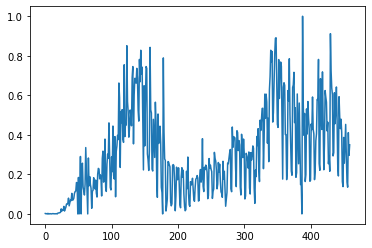

In [16]:
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()